In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [19]:
import pandas as pd
filepath=pd.read_csv('energysource.csv')
tot_renewable_energy=[filepath['Other renewables excluding bioenergy'][i]
                      +filepath['Electricity from bioenergy'][i]
                      +filepath['Electricity from solar'][i]
                      +filepath['Electricity from wind'][i]
                      +filepath['Electricity from hydro'][i]
                      +filepath['Electricity from nuclear'][i] for i in range(len(filepath['Electricity from nuclear']))]
tot_nonrenewable_energy=[filepath['Electricity from oil'][i]
                      +filepath['Electricity from gas'][i]
                      +filepath['Electricity from coal'][i]  for i in range(len(filepath['Electricity from nuclear']))]

total_energy=[tot_renewable_energy[i]+tot_nonrenewable_energy[i] for i in range (len(tot_renewable_energy))]

tot=pd.DataFrame({
    'Year': filepath['Year'],
    'Electricity from bioenergy':filepath['Electricity from bioenergy'],
    'Bioenergy Percent':[filepath['Electricity from bioenergy'][i]/total_energy[i] for i in range (len(total_energy))],
    'Electricity from solar':filepath['Electricity from solar'],
    'Solar Percent': [filepath['Electricity from solar'][i]/total_energy[i] for i in range (len(total_energy))],
    'Electricity from wind':filepath['Electricity from wind'],
    'Wind Percent':[filepath['Electricity from wind'][i]/total_energy[i] for i in range (len(total_energy))],
   ' Electricity from hydro':filepath['Electricity from hydro'],
   'Hydro Percent':[filepath['Electricity from hydro'][i]/total_energy[i] for i in range (len(total_energy))],
   ' Electricity from nuclear':filepath['Electricity from nuclear'],
   'Nuclear Percent':[filepath['Electricity from nuclear'][i]/total_energy[i] for i in range (len(total_energy))],
    'Total_Energy': total_energy,
    'Electricity from coal':filepath['Electricity from coal'],
    'Coal Percent': [filepath['Electricity from coal'][i]/total_energy[i] for i in range (len(total_energy))],
    'Electricity from oil':filepath['Electricity from oil'],
    'Oil Percent': [filepath['Electricity from oil'][i]/total_energy[i] for i in range (len(total_energy))],
    'Electricity from gas':filepath['Electricity from gas'],
    'Gas Percent':[filepath['Electricity from gas'][i]/total_energy[i] for i in range (len(total_energy))]



})
tot.to_csv('tot_energysource_sep.csv',index='False')


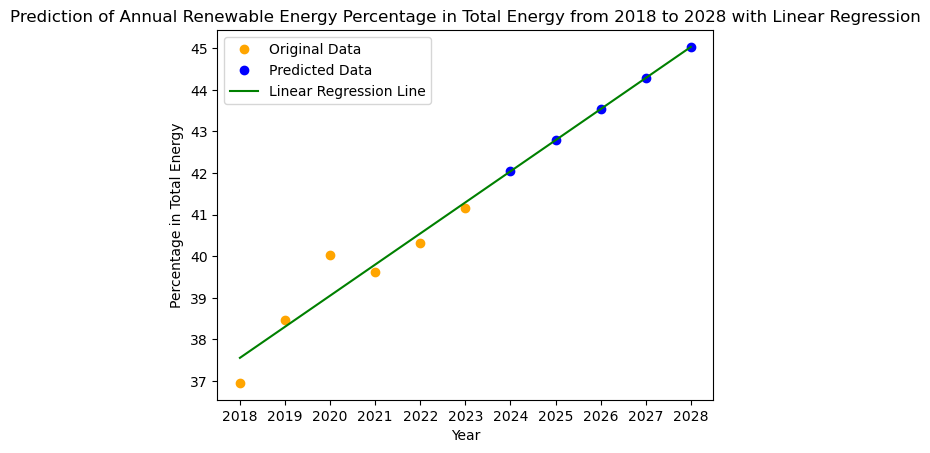

0.7475855460832197
-1471.071144047604


In [ ]:
# Reload the CSV file
filepath = pd.read_csv('combined_energy_statistics_by_year.csv')

# Original years and values
years = [2018, 2019, 2020, 2021, 2022, 2023]
values = [filepath['Percentage'][i] for i in range(6)]

# Reshape years for linear regression model
years_array = np.array(years).reshape(-1, 1)
values_array = np.array(values)

# Initialize and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(years_array, values_array)

# Predict future values for 2024-2028
future_years = np.array([2024, 2025, 2026, 2027, 2028]).reshape(-1, 1)
predicted_values = linear_model.predict(future_years)

# Combine original and predicted values for plotting
extended_years = years + [2024, 2025, 2026, 2027, 2028]
extended_values = list(values) + list(predicted_values)

# Generate predictions for all years (both original and future) for the regression line
all_years = np.array(extended_years).reshape(-1, 1)
all_predicted_values = linear_model.predict(all_years)

# Plot original data, predictions, and the regression line
plt.plot(years, values, 'o', color='orange', label='Original Data')  # Original data in orange
plt.plot([2024, 2025, 2026, 2027, 2028], predicted_values, 'o', color='blue', label='Predicted Data')  # Predicted data in blue
plt.plot(extended_years, all_predicted_values, linestyle='-', color='green', label='Linear Regression Line')  # Regression line in green

# Set x-axis labels to display all years
plt.xticks(extended_years)

plt.xlabel('Year')
plt.ylabel('Percentage in Total Energy')
plt.title('Prediction of Annual Renewable Energy Percentage in Total Energy from 2018 to 2028 with Linear Regression')
plt.legend()
plt.savefig('Prediction of Annual Renewable Energy Percentage in Total Energy from 2018 to 2028.png')
plt.show()

slope = linear_model.coef_[0]
intercept = linear_model.intercept_
print(slope)
print(intercept)

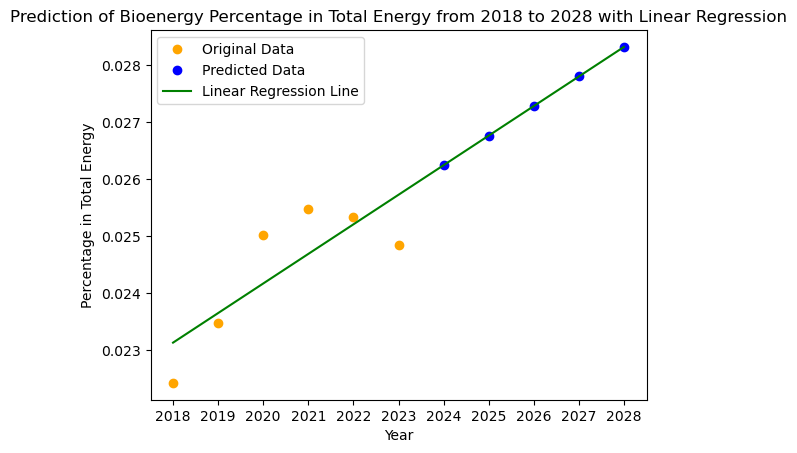

0.0005193564761916456
-1.0249323789041274


In [25]:
# Reload the CSV file
filepath = pd.read_csv('tot_energysource_sep.csv')

# Original years and values
years = [2018, 2019, 2020, 2021, 2022, 2023]
values = [filepath['Bioenergy Percent'][i] for i in range(6)]

# Reshape years for linear regression model
years_array = np.array(years).reshape(-1, 1)
values_array = np.array(values)

# Initialize and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(years_array, values_array)

# Predict future values for 2024-2028
future_years = np.array([2024, 2025, 2026, 2027, 2028]).reshape(-1, 1)
predicted_values = linear_model.predict(future_years)

# Combine original and predicted values for plotting
extended_years = years + [2024, 2025, 2026, 2027, 2028]
extended_values = list(values) + list(predicted_values)

# Generate predictions for all years (both original and future) for the regression line
all_years = np.array(extended_years).reshape(-1, 1)
all_predicted_values = linear_model.predict(all_years)

# Plot original data, predictions, and the regression line
plt.plot(years, values, 'o', color='orange', label='Original Data')  # Original data in orange
plt.plot([2024, 2025, 2026, 2027, 2028], predicted_values, 'o', color='blue', label='Predicted Data')  # Predicted data in blue
plt.plot(extended_years, all_predicted_values, linestyle='-', color='green', label='Linear Regression Line')  # Regression line in green

# Set x-axis labels to display all years
plt.xticks(extended_years)

plt.xlabel('Year')
plt.ylabel('Percentage in Total Energy')
plt.title('Prediction of Bioenergy Percentage in Total Energy from 2018 to 2028 with Linear Regression')
plt.legend()
plt.savefig('predictions/Prediction of Bioenergy Percentage in Total Energy from 2018 to 2028.png', dpi=300, bbox_inches='tight')
plt.show()

slope = linear_model.coef_[0]
intercept = linear_model.intercept_
print(slope)
print(intercept)

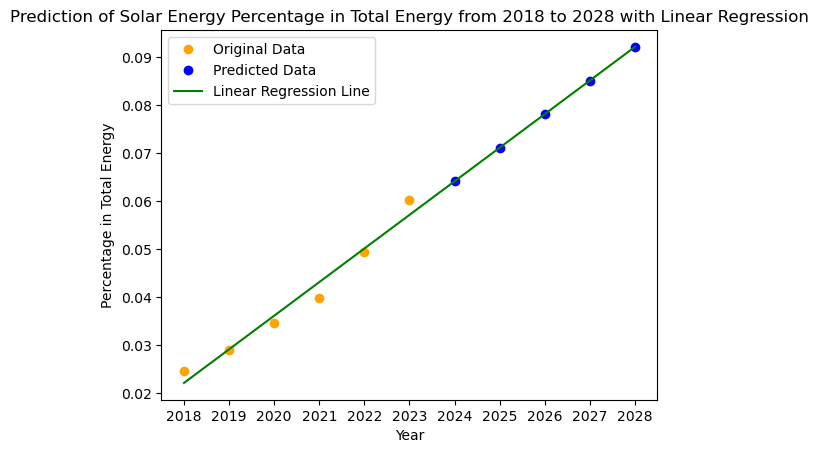

0.006999473791285229
-14.1028007372921


In [26]:
# Reload the CSV file
filepath = pd.read_csv('tot_energysource_sep.csv')

# Original years and values
years = [2018, 2019, 2020, 2021, 2022, 2023]
values = [filepath['Solar Percent'][i] for i in range(6)]

# Reshape years for linear regression model
years_array = np.array(years).reshape(-1, 1)
values_array = np.array(values)

# Initialize and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(years_array, values_array)

# Predict future values for 2024-2028
future_years = np.array([2024, 2025, 2026, 2027, 2028]).reshape(-1, 1)
predicted_values = linear_model.predict(future_years)

# Combine original and predicted values for plotting
extended_years = years + [2024, 2025, 2026, 2027, 2028]
extended_values = list(values) + list(predicted_values)

# Generate predictions for all years (both original and future) for the regression line
all_years = np.array(extended_years).reshape(-1, 1)
all_predicted_values = linear_model.predict(all_years)

# Plot original data, predictions, and the regression line
plt.plot(years, values, 'o', color='orange', label='Original Data')  # Original data in orange
plt.plot([2024, 2025, 2026, 2027, 2028], predicted_values, 'o', color='blue', label='Predicted Data')  # Predicted data in blue
plt.plot(extended_years, all_predicted_values, linestyle='-', color='green', label='Linear Regression Line')  # Regression line in green

# Set x-axis labels to display all years
plt.xticks(extended_years)

plt.xlabel('Year')
plt.ylabel('Percentage in Total Energy')
plt.title('Prediction of Solar Energy Percentage in Total Energy from 2018 to 2028 with Linear Regression')
plt.legend()
plt.savefig('predictions/Prediction of Solar Percentage in Total Energy from 2018 to 2028.png', dpi=300, bbox_inches='tight')
plt.show()

slope = linear_model.coef_[0]
intercept = linear_model.intercept_
print(slope)
print(intercept)

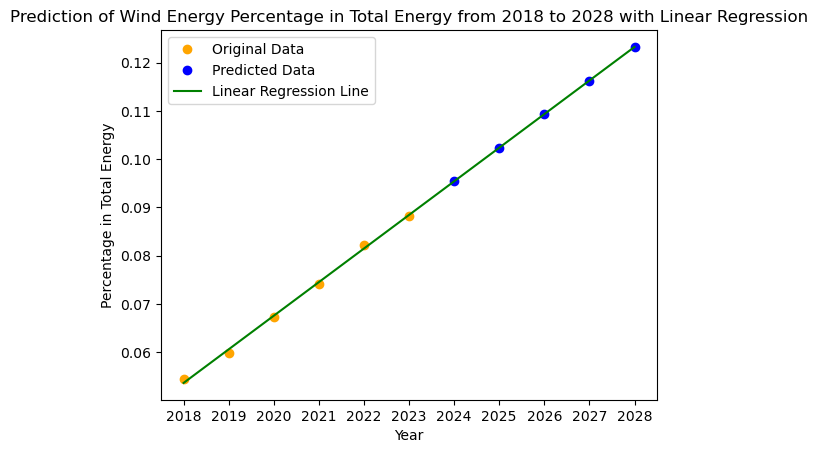

0.006964098717905855
-13.99992881017315


In [27]:
# Reload the CSV file
filepath = pd.read_csv('tot_energysource_sep.csv')

# Original years and values
years = [2018, 2019, 2020, 2021, 2022, 2023]
values = [filepath['Wind Percent'][i] for i in range(6)]

# Reshape years for linear regression model
years_array = np.array(years).reshape(-1, 1)
values_array = np.array(values)

# Initialize and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(years_array, values_array)

# Predict future values for 2024-2028
future_years = np.array([2024, 2025, 2026, 2027, 2028]).reshape(-1, 1)
predicted_values = linear_model.predict(future_years)

# Combine original and predicted values for plotting
extended_years = years + [2024, 2025, 2026, 2027, 2028]
extended_values = list(values) + list(predicted_values)

# Generate predictions for all years (both original and future) for the regression line
all_years = np.array(extended_years).reshape(-1, 1)
all_predicted_values = linear_model.predict(all_years)

# Plot original data, predictions, and the regression line
plt.plot(years, values, 'o', color='orange', label='Original Data')  # Original data in orange
plt.plot([2024, 2025, 2026, 2027, 2028], predicted_values, 'o', color='blue', label='Predicted Data')  # Predicted data in blue
plt.plot(extended_years, all_predicted_values, linestyle='-', color='green', label='Linear Regression Line')  # Regression line in green

# Set x-axis labels to display all years
plt.xticks(extended_years)

plt.xlabel('Year')
plt.ylabel('Percentage in Total Energy')
plt.title('Prediction of Wind Energy Percentage in Total Energy from 2018 to 2028 with Linear Regression')
plt.legend()
plt.savefig('predictions/Prediction of Wind Percentage in Total Energy from 2018 to 2028.png', dpi=300, bbox_inches='tight')
plt.show()

slope = linear_model.coef_[0]
intercept = linear_model.intercept_
print(slope)
print(intercept)

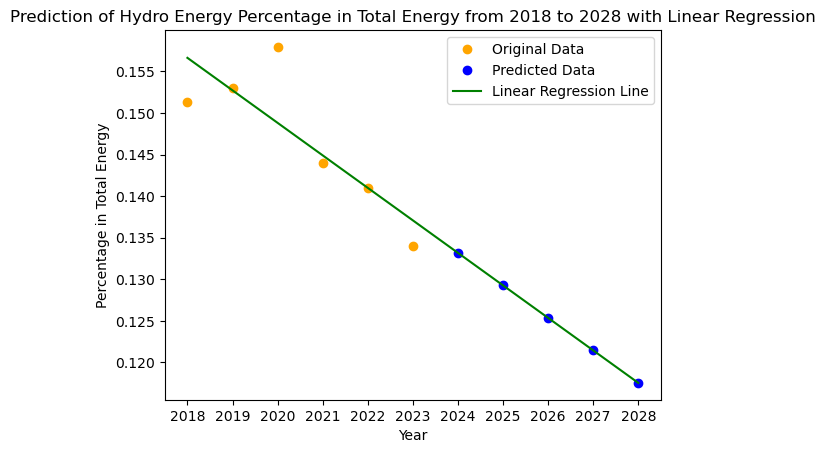

-0.003909503377416621
8.04600316410604


In [28]:
# Reload the CSV file
filepath = pd.read_csv('tot_energysource_sep.csv')

# Original years and values
years = [2018, 2019, 2020, 2021, 2022, 2023]
values = [filepath['Hydro Percent'][i] for i in range(6)]

# Reshape years for linear regression model
years_array = np.array(years).reshape(-1, 1)
values_array = np.array(values)

# Initialize and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(years_array, values_array)

# Predict future values for 2024-2028
future_years = np.array([2024, 2025, 2026, 2027, 2028]).reshape(-1, 1)
predicted_values = linear_model.predict(future_years)

# Combine original and predicted values for plotting
extended_years = years + [2024, 2025, 2026, 2027, 2028]
extended_values = list(values) + list(predicted_values)

# Generate predictions for all years (both original and future) for the regression line
all_years = np.array(extended_years).reshape(-1, 1)
all_predicted_values = linear_model.predict(all_years)

# Plot original data, predictions, and the regression line
plt.plot(years, values, 'o', color='orange', label='Original Data')  # Original data in orange
plt.plot([2024, 2025, 2026, 2027, 2028], predicted_values, 'o', color='blue', label='Predicted Data')  # Predicted data in blue
plt.plot(extended_years, all_predicted_values, linestyle='-', color='green', label='Linear Regression Line')  # Regression line in green

# Set x-axis labels to display all years
plt.xticks(extended_years)

plt.xlabel('Year')
plt.ylabel('Percentage in Total Energy')
plt.title('Prediction of Hydro Energy Percentage in Total Energy from 2018 to 2028 with Linear Regression')
plt.legend()
plt.savefig('predictions/Prediction of Hydro Percentage in Total Energy from 2018 to 2028.png', dpi=300, bbox_inches='tight')
plt.show()

slope = linear_model.coef_[0]
intercept = linear_model.intercept_
print(slope)
print(intercept)

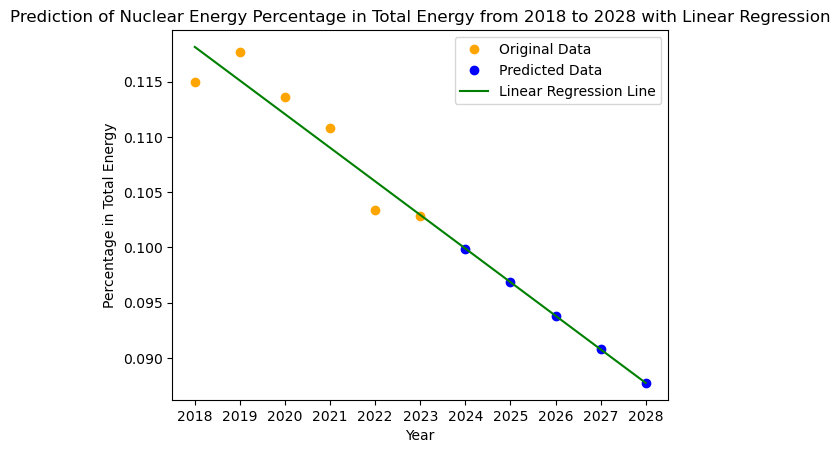

-0.0030414127561043908
6.25571147138644


In [29]:
# Reload the CSV file
filepath = pd.read_csv('tot_energysource_sep.csv')

# Original years and values
years = [2018, 2019, 2020, 2021, 2022, 2023]
values = [filepath['Nuclear Percent'][i] for i in range(6)]

# Reshape years for linear regression model
years_array = np.array(years).reshape(-1, 1)
values_array = np.array(values)

# Initialize and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(years_array, values_array)

# Predict future values for 2024-2028
future_years = np.array([2024, 2025, 2026, 2027, 2028]).reshape(-1, 1)
predicted_values = linear_model.predict(future_years)

# Combine original and predicted values for plotting
extended_years = years + [2024, 2025, 2026, 2027, 2028]
extended_values = list(values) + list(predicted_values)

# Generate predictions for all years (both original and future) for the regression line
all_years = np.array(extended_years).reshape(-1, 1)
all_predicted_values = linear_model.predict(all_years)

# Plot original data, predictions, and the regression line
plt.plot(years, values, 'o', color='orange', label='Original Data')  # Original data in orange
plt.plot([2024, 2025, 2026, 2027, 2028], predicted_values, 'o', color='blue', label='Predicted Data')  # Predicted data in blue
plt.plot(extended_years, all_predicted_values, linestyle='-', color='green', label='Linear Regression Line')  # Regression line in green

# Set x-axis labels to display all years
plt.xticks(extended_years)

plt.xlabel('Year')
plt.ylabel('Percentage in Total Energy')
plt.title('Prediction of Nuclear Energy Percentage in Total Energy from 2018 to 2028 with Linear Regression')
plt.legend()
plt.savefig('predictions/Prediction of Nuclear Percentage in Total Energy from 2018 to 2028.png', dpi=300, bbox_inches='tight')
plt.show()

slope = linear_model.coef_[0]
intercept = linear_model.intercept_
print(slope)
print(intercept)

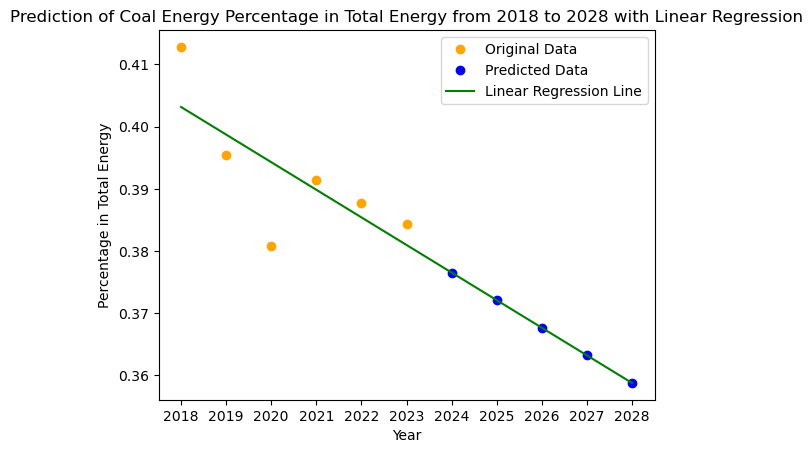

-0.004435620565799054
9.354244635986639


In [30]:
# Reload the CSV file
filepath = pd.read_csv('tot_energysource_sep.csv')

# Original years and values
years = [2018, 2019, 2020, 2021, 2022, 2023]
values = [filepath['Coal Percent'][i] for i in range(6)]

# Reshape years for linear regression model
years_array = np.array(years).reshape(-1, 1)
values_array = np.array(values)

# Initialize and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(years_array, values_array)

# Predict future values for 2024-2028
future_years = np.array([2024, 2025, 2026, 2027, 2028]).reshape(-1, 1)
predicted_values = linear_model.predict(future_years)

# Combine original and predicted values for plotting
extended_years = years + [2024, 2025, 2026, 2027, 2028]
extended_values = list(values) + list(predicted_values)

# Generate predictions for all years (both original and future) for the regression line
all_years = np.array(extended_years).reshape(-1, 1)
all_predicted_values = linear_model.predict(all_years)

# Plot original data, predictions, and the regression line
plt.plot(years, values, 'o', color='orange', label='Original Data')  # Original data in orange
plt.plot([2024, 2025, 2026, 2027, 2028], predicted_values, 'o', color='blue', label='Predicted Data')  # Predicted data in blue
plt.plot(extended_years, all_predicted_values, linestyle='-', color='green', label='Linear Regression Line')  # Regression line in green

# Set x-axis labels to display all years
plt.xticks(extended_years)

plt.xlabel('Year')
plt.ylabel('Percentage in Total Energy')
plt.title('Prediction of Coal Energy Percentage in Total Energy from 2018 to 2028 with Linear Regression')
plt.legend()
plt.savefig('predictions/Prediction of Coal Percentage in Total Energy from 2018 to 2028.png', dpi=300, bbox_inches='tight')
plt.show()

slope = linear_model.coef_[0]
intercept = linear_model.intercept_
print(slope)
print(intercept)

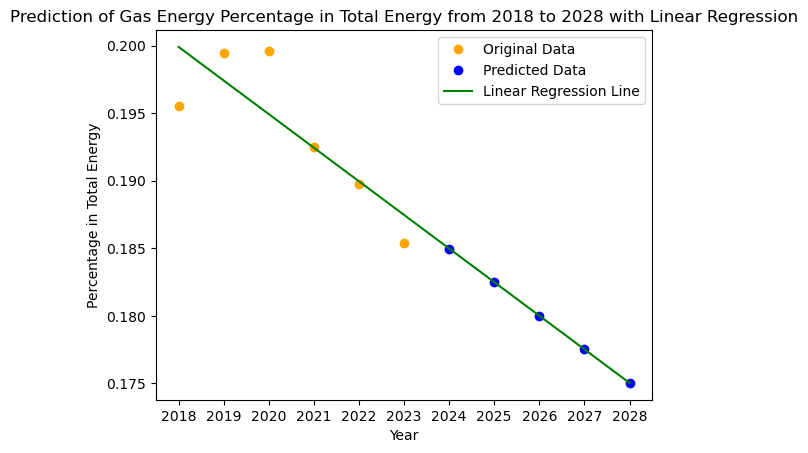

-0.002487251921876305
5.219182283584952


In [31]:
# Reload the CSV file
filepath = pd.read_csv('tot_energysource_sep.csv')

# Original years and values
years = [2018, 2019, 2020, 2021, 2022, 2023]
values = [filepath['Gas Percent'][i] for i in range(6)]

# Reshape years for linear regression model
years_array = np.array(years).reshape(-1, 1)
values_array = np.array(values)

# Initialize and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(years_array, values_array)

# Predict future values for 2024-2028
future_years = np.array([2024, 2025, 2026, 2027, 2028]).reshape(-1, 1)
predicted_values = linear_model.predict(future_years)

# Combine original and predicted values for plotting
extended_years = years + [2024, 2025, 2026, 2027, 2028]
extended_values = list(values) + list(predicted_values)

# Generate predictions for all years (both original and future) for the regression line
all_years = np.array(extended_years).reshape(-1, 1)
all_predicted_values = linear_model.predict(all_years)

# Plot original data, predictions, and the regression line
plt.plot(years, values, 'o', color='orange', label='Original Data')  # Original data in orange
plt.plot([2024, 2025, 2026, 2027, 2028], predicted_values, 'o', color='blue', label='Predicted Data')  # Predicted data in blue
plt.plot(extended_years, all_predicted_values, linestyle='-', color='green', label='Linear Regression Line')  # Regression line in green

# Set x-axis labels to display all years
plt.xticks(extended_years)

plt.xlabel('Year')
plt.ylabel('Percentage in Total Energy')
plt.title('Prediction of Gas Energy Percentage in Total Energy from 2018 to 2028 with Linear Regression')
plt.legend()
plt.savefig('predictions/Prediction of Gas Percentage in Total Energy from 2018 to 2028.png', dpi=300, bbox_inches='tight')

plt.show()

slope = linear_model.coef_[0]
intercept = linear_model.intercept_
print(slope)
print(intercept)

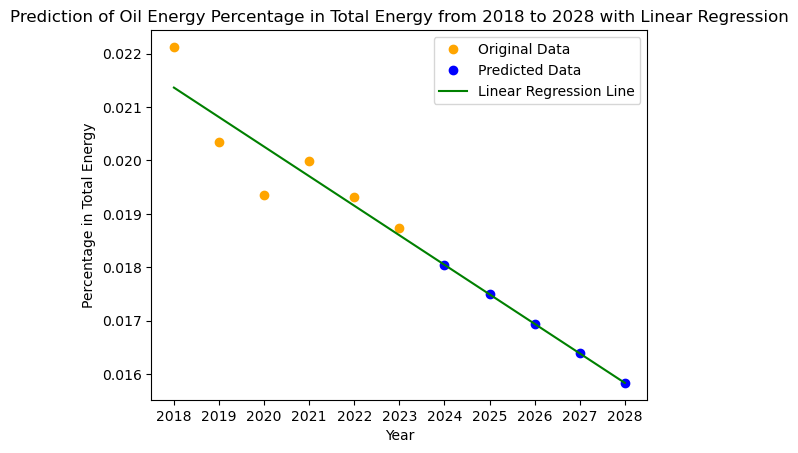

-0.0005529829731568147
1.1372845209044042


In [32]:
# Reload the CSV file
filepath = pd.read_csv('tot_energysource_sep.csv')

# Original years and values
years = [2018, 2019, 2020, 2021, 2022, 2023]
values = [filepath['Oil Percent'][i] for i in range(6)]

# Reshape years for linear regression model
years_array = np.array(years).reshape(-1, 1)
values_array = np.array(values)

# Initialize and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(years_array, values_array)

# Predict future values for 2024-2028
future_years = np.array([2024, 2025, 2026, 2027, 2028]).reshape(-1, 1)
predicted_values = linear_model.predict(future_years)

# Combine original and predicted values for plotting
extended_years = years + [2024, 2025, 2026, 2027, 2028]
extended_values = list(values) + list(predicted_values)

# Generate predictions for all years (both original and future) for the regression line
all_years = np.array(extended_years).reshape(-1, 1)
all_predicted_values = linear_model.predict(all_years)

# Plot original data, predictions, and the regression line
plt.plot(years, values, 'o', color='orange', label='Original Data')  # Original data in orange
plt.plot([2024, 2025, 2026, 2027, 2028], predicted_values, 'o', color='blue', label='Predicted Data')  # Predicted data in blue
plt.plot(extended_years, all_predicted_values, linestyle='-', color='green', label='Linear Regression Line')  # Regression line in green

# Set x-axis labels to display all years
plt.xticks(extended_years)

plt.xlabel('Year')
plt.ylabel('Percentage in Total Energy')
plt.title('Prediction of Oil Energy Percentage in Total Energy from 2018 to 2028 with Linear Regression')
plt.legend()
plt.savefig('predictions/Prediction of Oil Percentage in Total Energy from 2018 to 2028.png', dpi=300, bbox_inches='tight')

plt.show()

slope = linear_model.coef_[0]
intercept = linear_model.intercept_
print(slope)
print(intercept)

In [ ]:
import sympy as sp

# Define the variable t
t = sp.symbols('t')

# Define the function E(t) and the P functions of t
E = sp.Function('E')(t)
P_bio = sp.Function('P_bio')(t)
P_solar = sp.Function('P_solar')(t)
P_wind = sp.Function('P_wind')(t)
P_hydro = sp.Function('P_hydro')(t)
P_nuclear = sp.Function('P_nuclear')(t)
P_coal = sp.Function('P_coal')(t)
P_gas = sp.Function('P_gas')(t)
P_oil = sp.Function('P_oil')(t)

# Define constants k values
k_bio, k_solar, k_wind, k_hydro, k_nuclear, k_coal, k_gas, k_oil = sp.symbols('k_bio k_solar k_wind k_hydro k_nuclear k_coal k_gas k_oil')

# Define the expression for C(t)
C_t = E * (P_bio * k_bio + P_solar * k_solar + P_wind * k_wind + 
           P_hydro * k_hydro + P_nuclear * k_nuclear + 
           P_coal * k_coal + P_gas * k_gas + P_oil * k_oil)

# Differentiate C(t) with respect to t
C_t_derivative = sp.diff(C_t, t)

# Display the result
sp.pprint(C_t_derivative)
